# **Bibliotecas Python**

In [ ]:
# Importando as bibliotecas Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import seaborn as sns
from collections import Counter
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# **Carregando Dados**

In [ ]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving TrainingWiDS2021.csv to TrainingWiDS2021.csv


In [ ]:
# Carregando os dados
df = pd.read_csv('TrainingWiDS2021.csv')

In [ ]:
# Verificando o formato dos dados
df.shape

(130157, 181)

In [ ]:
# Verificando as primeiras linhas do dataset
df.head(5)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
# Verificando as últimas linhas do dataset
df.tail(5)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
130152,130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,1109,admit,Cardiac ICU,0.023611,0,90.0,NaN,110.0,104.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,106.0,NaN,0,120.0,NaN,NaN,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
130153,130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,1106,admit,MICU,0.009722,0,78.4,3.5,105.0,207.01,0,0,0.7,32.0,1.07,NaN,4.0,6.0,0.0,4.0,139.0,112.0,39.0,0,125.0,NaN,NaN,NaN,NaN,42.0,...,NaN,NaN,NaN,NaN,1.27,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
130154,130155,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,Accident & Emergency,1104,admit,Cardiac ICU,0.143056,0,102.0,NaN,114.0,102.01,0,0,NaN,30.0,2.43,1.0,1.0,1.0,0.0,1.0,346.0,104.0,NaN,1,58.0,44.0,44.0,80.0,7.224,34.0,...,10.2,10.2,33.0,33.0,1.14,1.11,9.8,9.8,232.0,232.0,3.9,3.9,NaN,NaN,41.8,41.8,44.0,23.2,7.614,7.161,163.0,80.0,163.0,80.0,36.9,36.9,7.231,7.231,163.0,163.0,163.0,163.0,0,0,0,0,0,0,0,1
130155,130156,222562,170,81.0,24.408579,0,Caucasian,M,185.4,Emergency Department,Accident & Emergency,1108,admit,Med-Surg ICU,0.188194,0,83.9,NaN,124.0,306.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,137.0,83.0,32.0,0,60.0,NaN,NaN,NaN,NaN,31.0,...,10.9,10.9,33.0,33.0,NaN,NaN,1.3,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
130156,130157,157942,7,35.0,30.132358,0,African American,M,182.9,Emergency Department,Accident & Emergency,1106,admit,MICU,0.075000,0,100.8,NaN,105.0,207.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,97.0,NaN,0,118.0,NaN,NaN,NaN,NaN,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,4.1,135.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


# **Verificação de Dados Nulos**

In [ ]:
# Verificando se existem valores nulos
df.isnull().values.any()

True

In [ ]:
# Verificando os dados faltantes em cada coluna
data_null = df.isnull().sum()
print(data_null)

Unnamed: 0                        0
encounter_id                      0
hospital_id                       0
age                            4988
bmi                            4490
                               ... 
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
Length: 181, dtype: int64


In [ ]:
# Verificando o percentual em cada coluna de dados faltantes
data_null_perc = (df.isnull().sum() / len(df['encounter_id']))*100
print(data_null_perc)

Unnamed: 0                     0.000000
encounter_id                   0.000000
hospital_id                    0.000000
age                            3.832295
bmi                            3.449680
                                 ...   
immunosuppression              0.000000
leukemia                       0.000000
lymphoma                       0.000000
solid_tumor_with_metastasis    0.000000
diabetes_mellitus              0.000000
Length: 181, dtype: float64


In [ ]:
# Substituir os dados faltantes: Na variável bmi por nenhuma.
# E na idade substituir pela média de idades no dataset.
df['bmi'].fillna('None', inplace = True)
df['age'].fillna(df['age'].mean(), inplace = True)
df.head(10)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.7328,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.4219,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.9527,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.6355,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,None,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
5,6,182697,83,67.0,27.5556,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,NaN,301.0,403.01,0,0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0,130.0,NaN,NaN,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
6,7,195124,83,59.0,57.451,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,156.6,NaN,108.0,203.01,0,0,NaN,18.0,0.78,1.0,4.0,6.0,0.0,5.0,197.0,133.0,33.5,1,138.0,43.0,43.0,370.0,7.42,53.0,...,10.7,10.7,33.5,33.5,NaN,NaN,NaN,NaN,278.0,278.0,4.2,4.2,135.0,135.0,5.9,5.9,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.000000,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.0,0,0,0,0,0,0,0,1
7,8,179261,33,70.0,None,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,91,admit,Med-Surg ICU,0.002083,0,NaN

In [ ]:
# Média de idade nesse dataset
age_mean = df['age'].mean()
print(age_mean)

61.99510262126124


In [ ]:
# Verificando os dados faltantes em cada coluna que não foi visualizada anteriormente
df['ethnicity'].isnull().sum()

1587

In [ ]:
# Verificando o percentual em cada coluna de dados faltantes
data_null_perc1 = (df['ethnicity'].isnull().sum() / len(df['encounter_id']))*100
print(data_null_perc1)

1.2192966955292455


**Contagem de cada uma das palavras na variável ethnicity E substituindo os valores nulos**

In [ ]:
# Quantidade de cada uma das etnias na pesquisa
ethnicity_text = df['ethnicity']
counter = Counter(ethnicity_text)
print(counter)

Counter({'Caucasian': 100236, 'African American': 13911, 'Other/Unknown': 6261, 'Hispanic': 5049, 'Asian': 2198, nan: 1587, 'Native American': 915})


In [ ]:
# Como a maioria das etnias são caucasian vamos substituir os valores nulos por caucasian
df['ethnicity'].fillna('Caucasian', inplace = True)
df.head(13)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.7328,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.4219,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.9527,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.6355,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,None,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
5,6,182697,83,67.0,27.5556,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,NaN,301.0,403.01,0,0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0,130.0,NaN,NaN,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
6,7,195124,83,59.0,57.451,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,156.6,NaN,108.0,203.01,0,0,NaN,18.0,0.78,1.0,4.0,6.0,0.0,5.0,197.0,133.0,33.5,1,138.0,43.0,43.0,370.0,7.42,53.0,...,10.7,10.7,33.5,33.5,NaN,NaN,NaN,NaN,278.0,278.0,4.2,4.2,135.0,135.0,5.9,5.9,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.000000,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.0,0,0,0,0,0,0,0,1
7,8,179261,33,70.0,None,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,91,admit,Med-Surg ICU,0.002083,0,NaN

**Contagem de dados faltantes na variável gender e substituindo pela maioria**

In [ ]:
# Verificando os dados faltantes em cada coluna que não foi visualizada anteriormente
df['gender'].isnull().sum()

66

In [ ]:
# Quantidade de cada um dos gêneros na pesquisa
gender_text = df['gender']
counter1 = Counter(gender_text)
print(counter1)

Counter({'M': 70518, 'F': 59573, nan: 66})


In [ ]:
# Como a maioria dos gêneros são masculinos vamos substituir os valores nulos por M
df['gender'].fillna('M', inplace = True)
df.head(10)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.7328,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.4219,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.9527,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.6355,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,None,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
5,6,182697,83,67.0,27.5556,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,NaN,301.0,403.01,0,0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0,130.0,NaN,NaN,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
6,7,195124,83,59.0,57.451,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,156.6,NaN,108.0,203.01,0,0,NaN,18.0,0.78,1.0,4.0,6.0,0.0,5.0,197.0,133.0,33.5,1,138.0,43.0,43.0,370.0,7.42,53.0,...,10.7,10.7,33.5,33.5,NaN,NaN,NaN,NaN,278.0,278.0,4.2,4.2,135.0,135.0,5.9,5.9,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.000000,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.0,0,0,0,0,0,0,0,1
7,8,179261,33,70.0,None,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,91,admit,Med-Surg ICU,0.002083,0,NaN

**Verificando os dados faltantes na variável height e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável height
df['height'].isnull().sum()

2077

In [ ]:
# Média de altura nesse dataset
height_mean = df['height'].mean()
print(height_mean)

169.60721892569077


In [ ]:
# E na altura substituir pela média de alturas no dataset.
df['height'].fillna(df['height'].mean(), inplace = True)

**Verificando os dados faltantes na variável hospital_admit_source e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável hospital_admit_source
df['hospital_admit_source'].isnull().sum()

33198

In [ ]:
# Substituir os dados faltantes: Na variável hospital_admit_source por nenhuma.
df['hospital_admit_source'].fillna('None', inplace = True)

**Verificando os dados faltantes na variável icu_admit_source e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável icu_admit_source
df['icu_admit_source'].isnull().sum()

240

In [ ]:
# Substituir os dados faltantes: Na variável icu_admit_source por nenhuma.
df['icu_admit_source'].fillna('None', inplace = True)

**Verificando os dados faltantes na variável weight e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável weight
df['weight'].isnull().sum()

3463

In [ ]:
# Média de peso nesse dataset
weight_mean = df['weight'].mean()
print(weight_mean)

83.79110431433001


In [ ]:
# E no peso substituir pela média de peso no dataset.
df['weight'].fillna(df['weight'].mean(), inplace = True)

**Verificando os dados faltantes na variável albumin_apache e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável albumin_apache
df['albumin_apache'].isnull().sum()

78163

In [ ]:
# Média de albumin_apache nesse dataset
albumin_apache_mean = df['albumin_apache'].mean()
print(albumin_apache_mean)

2.886149171058234


In [ ]:
# E no albumin substituir pela média de albumin no dataset.
df['albumin_apache'].fillna(df['albumin_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável apache_2_diagnosis e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável apache_2_diagnosis
df['apache_2_diagnosis'].isnull().sum()

1685

In [ ]:
# Quantidade de cada tipo de diagnóstico de gravidade Apache II na pesquisa
apache_2_diagnosis_text = df['apache_2_diagnosis']
counter2 = Counter(apache_2_diagnosis_text)
print(counter2)

Counter({113.0: 16402, 301.0: 9858, 302.0: 8904, 112.0: 5981, 308.0: 5855, 124.0: 5548, 117.0: 5290, 122.0: 5206, 303.0: 5072, 304.0: 4594, 110.0: 4395, 203.0: 3860, 106.0: 3537, 121.0: 3431, 202.0: 3408, 114.0: 3298, 305.0: 3111, 123.0: 2918, 119.0: 2712, 102.0: 2631, 307.0: 2629, 118.0: 2338, 120.0: 1994, 108.0: 1668, 214.0: 1656, 109.0: 1440, 105.0: 1369, 218.0: 1086, 213.0: 1041, 207.0: 973, 306.0: 830, 217.0: 802, 219.0: 714, 209.0: 645, 101.0: 605, 104.0: 580, 103.0: 487, 115.0: 392, 107.0: 300, 116.0: 279, 215.0: 215, 208.0: 214, 212.0: 138, 216.0: 66, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, na

In [ ]:
# Por ser valor de tipo de diagnóstico optei por não colocar o valor que mais aparece e 
# substituir os campos nulos por nenhum (None)
df['apache_2_diagnosis'].fillna('None', inplace = True)

**Verificando os dados faltantes na variável apache_3j_diagnosis e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável apache_3j_diagnosis
df['apache_3j_diagnosis'].isnull().sum()

865

In [ ]:
# Por ser valor de subtipo de diagnóstico optei por não colocar o valor que mais aparece e 
# substituir os campos nulos por nenhum (None)
df['apache_3j_diagnosis'].fillna('None', inplace = True)

**Verificando os dados faltantes na variável bilirubin_apache e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável bilirubin_apache
df['bilirubin_apache'].isnull().sum()

82560

In [ ]:
# Média de bilirubin_apache nesse dataset
bilirubin_apache_mean = df['bilirubin_apache'].mean()
print(bilirubin_apache_mean)

1.2012217156544167


In [ ]:
# E no bilirubin substituir pela média de bilirubin no dataset.
df['bilirubin_apache'].fillna(df['bilirubin_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável bun_apache e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável bun_apache
df['bun_apache'].isnull().sum()

25411

In [ ]:
# Média de bun_apache nesse dataset
bun_apache_mean = df['bun_apache'].mean()
print(bun_apache_mean)

25.718070475244886


In [ ]:
# E no bun_apache substituir pela média de bun_apache no dataset.
df['bun_apache'].fillna(df['bun_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável creatinine_apache e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável creatinine_apache
df['creatinine_apache'].isnull().sum()

24882

In [ ]:
# Média de creatinine_apache nesse dataset
creatinine_apache_mean = df['creatinine_apache'].mean()
print(creatinine_apache_mean)

1.4816293516979149


In [ ]:
# E no creatinine_apache substituir pela média de creatinine_apache no dataset.
df['creatinine_apache'].fillna(df['creatinine_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável fio2_apache e fazendo a média para substituir nos valores nulos**

In [ ]:
# Quantidade de valores nulos na variável fio2_apache
df['fio2_apache'].isnull().sum()

99720

In [ ]:
# Média de fio2_apache nesse dataset
fio2_apache_mean = df['fio2_apache'].mean()
print(fio2_apache_mean)

0.5957347636100355


In [ ]:
# E no fio2_apache substituir pela média de fio2_apache no dataset.
df['fio2_apache'].fillna(df['fio2_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável gcs_eyes_apache**

In [ ]:
# Quantidade de valores nulos na variável gcs_eyes_apache
df['gcs_eyes_apache'].isnull().sum()

2190

In [ ]:
# Quantidade de cada gcs_eyes_apache na pesquisa por ser tipo inteiro
gcs_eyes_apache_qtd = df['gcs_eyes_apache']
counter3 = Counter(gcs_eyes_apache_qtd)
print(counter3)

Counter({4.0: 91601, 3.0: 18662, 1.0: 11412, 2.0: 6292, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

In [ ]:
# substituir os campos nulos pelo valor inteiro que mais aparece na contagem
df['gcs_eyes_apache'].fillna(4, inplace = True)

**Verificando os dados faltantes na variável gcs_motor_apache**

In [ ]:
# Quantidade de valores nulos na variável gcs_motor_apache
df['gcs_motor_apache'].isnull().sum()

2190

In [ ]:
# Quantidade de cada gcs_motor_apache na pesquisa por ser tipo inteiro
# Também por ser o componente motor da Escala de Coma.
gcs_motor_apache_qtd = df['gcs_motor_apache']
counter4 = Counter(gcs_motor_apache_qtd)
print(counter4)

Counter({6.0: 101818, 5.0: 10833, 1.0: 7549, 4.0: 6457, 3.0: 807, 2.0: 503, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan:

In [ ]:
# substituir os campos nulos pelo valor inteiro que mais aparece na contagem
df['gcs_motor_apache'].fillna(6, inplace = True)

**Verificando os dados faltantes na variável gcs_unable_apache**

In [ ]:
# Quantidade de valores nulos na variável gcs_unable_apache
df['gcs_unable_apache'].isnull().sum()

709

In [ ]:
# Quantidade de cada gcs_unable_apache na pesquisa por ser tipo binário
# Se a Escala de Coma de Glasgow não pôde ser avaliada devido à sedação do paciente
gcs_unable_apache_qtd = df['gcs_unable_apache']
counter5 = Counter(gcs_unable_apache_qtd)
print(counter5)

Counter({0.0: 127967, 1.0: 1481, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

In [ ]:
# substituir os campos nulos pelo valor inteiro que mais aparece na contagem
df['gcs_unable_apache'].fillna(0, inplace = True)

**Verificando os dados faltantes na variável gcs_verbal_apache**

In [ ]:
# Quantidade de valores nulos na variável gcs_verbal_apache
df['gcs_verbal_apache'].isnull().sum()

2190

In [ ]:
# Quantidade de cada gcs_verbal_apache na pesquisa por ser tipo inteiro
# componente verbal da Escala de Coma de Glasgow medido durante as primeiras 24 horas, que resulta na pontuação APACHE III
gcs_verbal_apache_qtd = df['gcs_verbal_apache']
counter6 = Counter(gcs_verbal_apache_qtd)
print(counter6)

Counter({5.0: 82227, 1.0: 22818, 4.0: 15776, 3.0: 4384, 2.0: 2762, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

In [ ]:
# substituir os campos nulos pelo valor inteiro que mais aparece na contagem
df['gcs_verbal_apache'].fillna(5, inplace = True)

**Verificando os dados faltantes na variável glucose_apache**

In [ ]:
# Quantidade de valores nulos na variável glucose_apache
df['glucose_apache'].isnull().sum()

14696

In [ ]:
# Média de glucose_apache nesse dataset
glucose_apache_mean = df['glucose_apache'].mean()
print(glucose_apache_mean)

160.1414157161276


In [ ]:
# E no glucose_apache substituir pela média de glucose_apache no dataset.
df['glucose_apache'].fillna(df['glucose_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável heart_rate_apache**

In [ ]:
# Quantidade de valores nulos na variável heart_rate_apache
df['heart_rate_apache'].isnull().sum()

309

In [ ]:
# Média de heart_rate_apache nesse dataset
heart_rate_apache_mean = df['heart_rate_apache'].mean()
print(heart_rate_apache_mean)

99.85452991189699


In [ ]:
# E no heart_rate_apache substituir pela média de heart_rate_apache no dataset.
df['heart_rate_apache'].fillna(df['heart_rate_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável hematocrit_apache**

In [ ]:
# Quantidade de valores nulos na variável hematocrit_apache
df['hematocrit_apache'].isnull().sum()

26758

In [ ]:
# Média de hematocrit_apache nesse dataset
hematocrit_apache_mean = df['hematocrit_apache'].mean()
print(hematocrit_apache_mean)

32.97581698082194


In [ ]:
# E no hematocrit_apache substituir pela média de hematocrit_apache no dataset.
df['hematocrit_apache'].fillna(df['hematocrit_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável map_apache**

In [ ]:
# Quantidade de valores nulos na variável map_apache
df['map_apache'].isnull().sum()

420

In [ ]:
# Média de map_apache nesse dataset
map_apache_mean = df['map_apache'].mean()
print(map_apache_mean)

87.19304631677934


In [ ]:
# E no map_apache substituir pela média de map_apache no dataset.
df['map_apache'].fillna(df['map_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável paco2_apache**

In [ ]:
# Quantidade de valores nulos na variável paco2_apache
df['paco2_apache'].isnull().sum()

99720

In [ ]:
# Média de paco2_apache nesse dataset
paco2_apache_mean = df['paco2_apache'].mean()
print(paco2_apache_mean)

42.16124618063508


In [ ]:
# E no paco2_apache substituir pela média de paco2_apache no dataset.
df['paco2_apache'].fillna(df['paco2_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável paco2_for_ph_apache**

In [ ]:
# Quantidade de valores nulos na variável paco2_for_ph_apache
df['paco2_for_ph_apache'].isnull().sum()

99720

In [ ]:
# Média de paco2_for_ph_apache nesse dataset
paco2_for_ph_apache_mean = df['paco2_for_ph_apache'].mean()
print(paco2_for_ph_apache_mean)

42.16124618063508


In [ ]:
# E no paco2_for_ph_apache substituir pela média de paco2_for_ph_apache no dataset.
df['paco2_for_ph_apache'].fillna(df['paco2_for_ph_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável pao2_apache**

In [ ]:
# Quantidade de valores nulos na variável pao2_apache
df['pao2_apache'].isnull().sum()

99720

In [ ]:
# Média de pao2_apache nesse dataset
pao2_apache_mean = df['pao2_apache'].mean()
print(pao2_apache_mean)

132.06173735913526


In [ ]:
# E no pao2_apache substituir pela média de pao2_apache no dataset.
df['pao2_apache'].fillna(df['pao2_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável ph_apache**

In [ ]:
# Quantidade de valores nulos na variável ph_apache
df['ph_apache'].isnull().sum()

99720

In [ ]:
# Média de ph_apache nesse dataset
ph_apache_mean = df['ph_apache'].mean()
print(ph_apache_mean)

7.352154320070936


In [ ]:
# E no ph_apache substituir pela média de ph_apache no dataset.
df['ph_apache'].fillna(df['ph_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável resprate_apache**

In [ ]:
# Quantidade de valores nulos na variável resprate_apache	
df['resprate_apache'].isnull().sum()

808

In [ ]:
# Média de resprate_apache nesse dataset
resprate_apache_mean = df['resprate_apache'].mean()
print(resprate_apache_mean)

25.150602633186182


In [ ]:
# E no resprate_apache substituir pela média de resprate_apache no dataset.
df['resprate_apache'].fillna(df['resprate_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável sodium_apache**

In [ ]:
# Quantidade de valores nulos na variável sodium_apache
df['sodium_apache'].isnull().sum()

24519

In [ ]:
# Média de sodium_apache nesse dataset
sodium_apache_mean = df['sodium_apache'].mean()
print(sodium_apache_mean)

137.94526022832696


In [ ]:
# E no sodium_apache substituir pela média de sodium_apache no dataset.
df['sodium_apache'].fillna(df['sodium_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável temp_apache**

In [ ]:
# Quantidade de valores nulos na variável temp_apache
df['temp_apache'].isnull().sum()

6611

In [ ]:
# Média de temp_apache nesse dataset
temp_apache_mean = df['temp_apache'].mean()
print(temp_apache_mean)

36.420638061937886


In [ ]:
# E no temp_apache substituir pela média de temp_apache no dataset.
df['temp_apache'].fillna(df['temp_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável urineoutput_apache**

In [ ]:
# Quantidade de valores nulos na variável urineoutput_apache
df['urineoutput_apache'].isnull().sum()

63167

In [ ]:
# Média de urineoutput_apache nesse dataset
urineoutput_apache_mean = df['urineoutput_apache'].mean()
print(urineoutput_apache_mean)

1800.8034172073483


In [ ]:
# E no urineoutput_apache substituir pela média de urineoutput_apache no dataset.
df['urineoutput_apache'].fillna(df['urineoutput_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável wbc_apache**

In [ ]:
# Quantidade de valores nulos na variável wbc_apache
df['wbc_apache'].isnull().sum()

29475

In [ ]:
# Média de wbc_apache nesse dataset
wbc_apache_mean = df['wbc_apache'].mean()
print(wbc_apache_mean)

12.187662144176878


In [ ]:
# E no wbc_apache substituir pela média de wbc_apache no dataset.
df['wbc_apache'].fillna(df['wbc_apache'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_diasbp_invasive_max**

In [ ]:
# Quantidade de valores nulos na variável d1_diasbp_invasive_max
df['d1_diasbp_invasive_max'].isnull().sum()

95068

In [ ]:
# Média de d1_diasbp_invasive_max nesse dataset
d1_diasbp_invasive_max_mean = df['d1_diasbp_invasive_max'].mean()
print(d1_diasbp_invasive_max_mean)

79.26156345293397


In [ ]:
# E no d1_diasbp_invasive_max substituir pela média de d1_diasbp_invasive_max no dataset.
df['d1_diasbp_invasive_max'].fillna(df['d1_diasbp_invasive_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_diasbp_invasive_min**

In [ ]:
# Quantidade de valores nulos na variável d1_diasbp_invasive_min
df['d1_diasbp_invasive_min'].isnull().sum()

95068

In [ ]:
# Média de d1_diasbp_invasive_min nesse dataset
d1_diasbp_invasive_min_mean = df['d1_diasbp_invasive_min'].mean()
print(d1_diasbp_invasive_min_mean)

46.96970560574539


In [ ]:
# E no d1_diasbp_invasive_min substituir pela média de d1_diasbp_invasive_min no dataset.
df['d1_diasbp_invasive_min'].fillna(df['d1_diasbp_invasive_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_diasbp_max**

In [ ]:
# Quantidade de valores nulos na variável d1_diasbp_max
df['d1_diasbp_max'].isnull().sum()

277

In [ ]:
# Média de d1_diasbp_max nesse dataset
d1_diasbp_max_mean = df['d1_diasbp_max'].mean()
print(d1_diasbp_max_mean)

88.57551586079458


In [ ]:
# E no d1_diasbp_max substituir pela média de d1_diasbp_max no dataset.
df['d1_diasbp_max'].fillna(df['d1_diasbp_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_diasbp_min**

In [ ]:
# Quantidade de valores nulos na variável d1_diasbp_min
df['d1_diasbp_min'].isnull().sum()

277

In [ ]:
# Média de d1_diasbp_min nesse dataset
d1_diasbp_min_mean = df['d1_diasbp_min'].mean()
print(d1_diasbp_min_mean)

49.862988912842624


In [ ]:
# E no d1_diasbp_min substituir pela média de d1_diasbp_min no dataset.
df['d1_diasbp_min'].fillna(df['d1_diasbp_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_diasbp_noninvasive_max**

In [ ]:
# Quantidade de valores nulos na variável h1_diasbp_noninvasive_max
df['h1_diasbp_noninvasive_max'].isnull().sum()

11339

In [ ]:
# Média de h1_diasbp_noninvasive_max nesse dataset
h1_diasbp_noninvasive_max_mean = df['h1_diasbp_noninvasive_max'].mean()
print(h1_diasbp_noninvasive_max_mean)

75.90158898483395


In [ ]:
# E no h1_diasbp_noninvasive_max substituir pela média de h1_diasbp_noninvasive_max no dataset.
df['h1_diasbp_noninvasive_max'].fillna(df['h1_diasbp_noninvasive_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_diasbp_noninvasive_min**

In [ ]:
# Quantidade de valores nulos na variável h1_diasbp_noninvasive_min
df['h1_diasbp_noninvasive_min'].isnull().sum()

11339

In [ ]:
# Média de h1_diasbp_noninvasive_min nesse dataset
h1_diasbp_noninvasive_min_mean = df['h1_diasbp_noninvasive_min'].mean()
print(h1_diasbp_noninvasive_min_mean)

62.89517581511219


In [ ]:
# E no h1_diasbp_noninvasive_min substituir pela média de h1_diasbp_noninvasive_min no dataset.
df['h1_diasbp_noninvasive_min'].fillna(df['h1_diasbp_noninvasive_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_heartrate_max**

In [ ]:
# Quantidade de valores nulos na variável h1_heartrate_max
df['h1_heartrate_max'].isnull().sum()

4074

In [ ]:
# Média de h1_heartrate_max nesse dataset
h1_heartrate_max_mean = df['h1_heartrate_max'].mean()
print(h1_heartrate_max_mean)

92.45738124885987


In [ ]:
# E no h1_heartrate_max substituir pela média de h1_heartrate_max no dataset.
df['h1_heartrate_max'].fillna(df['h1_heartrate_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_heartrate_min**

In [ ]:
# Quantidade de valores nulos na variável h1_heartrate_min
df['h1_heartrate_min'].isnull().sum()

4074

In [ ]:
# E no h1_heartrate_min substituir pela média de h1_heartrate_min no dataset.
df['h1_heartrate_min'].fillna(df['h1_heartrate_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_mbp_invasive_max**

In [ ]:
# Quantidade de valores nulos na variável h1_mbp_invasive_max
df['h1_mbp_invasive_max'].isnull().sum()

104766

In [ ]:
# E no h1_mbp_invasive_max substituir pela média de h1_mbp_invasive_max no dataset.
df['h1_mbp_invasive_max'].fillna(df['h1_mbp_invasive_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_mbp_invasive_min**

In [ ]:
# Quantidade de valores nulos na variável h1_mbp_invasive_min
df['h1_mbp_invasive_min'].isnull().sum()

104766

In [ ]:
# E no h1_mbp_invasive_min substituir pela média de h1_mbp_invasive_min no dataset.
df['h1_mbp_invasive_min'].fillna(df['h1_mbp_invasive_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_mbp_max**

In [ ]:
# Quantidade de valores nulos na variável h1_mbp_max
df['h1_mbp_max'].isnull().sum()

6530

In [ ]:
# E no h1_mbp_max substituir pela média de h1_mbp_max no dataset.
df['h1_mbp_max'].fillna(df['h1_mbp_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_mbp_min**

In [ ]:
# Quantidade de valores nulos na variável h1_mbp_min
df['h1_mbp_min'].isnull().sum()

6530

In [ ]:
# E no h1_mbp_min substituir pela média de h1_mbp_min no dataset.
df['h1_mbp_min'].fillna(df['h1_mbp_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_mbp_noninvasive_max**

In [ ]:
# Quantidade de valores nulos na variável h1_mbp_noninvasive_max
df['h1_mbp_noninvasive_max'].isnull().sum()

13297

In [ ]:
# E no h1_mbp_noninvasive_max substituir pela média de h1_mbp_noninvasive_max no dataset.
df['h1_mbp_noninvasive_max'].fillna(df['h1_mbp_noninvasive_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_mbp_noninvasive_min**

In [ ]:
# Quantidade de valores nulos na variável h1_mbp_noninvasive_min
df['h1_mbp_noninvasive_min'].isnull().sum()

13297

In [ ]:
# E no h1_mbp_noninvasive_min substituir pela média de h1_mbp_noninvasive_min no dataset.
df['h1_mbp_noninvasive_min'].fillna(df['h1_mbp_noninvasive_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_resprate_max**

In [ ]:
# Quantidade de valores nulos na variável h1_resprate_max
df['h1_resprate_max'].isnull().sum()

6454

In [ ]:
# E no h1_resprate_max substituir pela média de h1_resprate_max no dataset.
df['h1_resprate_max'].fillna(df['h1_resprate_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_resprate_min**

In [ ]:
# Quantidade de valores nulos na variável h1_resprate_min
df['h1_resprate_min'].isnull().sum()

6454

In [ ]:
# E no h1_resprate_min substituir pela média de h1_resprate_min no dataset.
df['h1_resprate_min'].fillna(df['h1_resprate_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_spo2_max**

In [ ]:
# Quantidade de valores nulos na variável h1_spo2_max
df['h1_spo2_max'].isnull().sum()

6242

In [ ]:
# E no h1_spo2_max substituir pela média de h1_spo2_max no dataset.
df['h1_spo2_max'].fillna(df['h1_spo2_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_spo2_min**

In [ ]:
# Quantidade de valores nulos na variável h1_spo2_min
df['h1_spo2_min'].isnull().sum()

6242

In [ ]:
# E no h1_spo2_min substituir pela média de h1_spo2_min no dataset.
df['h1_spo2_min'].fillna(df['h1_spo2_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_sysbp_invasive_max**

In [ ]:
# Quantidade de valores nulos na variável h1_sysbp_invasive_max
df['h1_sysbp_invasive_max'].isnull().sum()

104807

In [ ]:
# E no h1_sysbp_invasive_max substituir pela média de h1_sysbp_invasive_max no dataset.
df['h1_sysbp_invasive_max'].fillna(df['h1_sysbp_invasive_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_sysbp_invasive_min**

In [ ]:
# Quantidade de valores nulos na variável h1_sysbp_invasive_min
df['h1_sysbp_invasive_min'].isnull().sum()

104807

In [ ]:
# E no h1_sysbp_invasive_min substituir pela média de h1_sysbp_invasive_min no dataset.
df['h1_sysbp_invasive_min'].fillna(df['h1_sysbp_invasive_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_sysbp_max**

In [ ]:
# Quantidade de valores nulos na variável h1_sysbp_max
df['h1_sysbp_max'].isnull().sum()

5519

In [ ]:
# E no h1_sysbp_max substituir pela média de h1_sysbp_max no dataset.
df['h1_sysbp_max'].fillna(df['h1_sysbp_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_sysbp_min**

In [ ]:
# Quantidade de valores nulos na variável h1_sysbp_min
df['h1_sysbp_min'].isnull().sum()

5519

In [ ]:
# E no h1_sysbp_min substituir pela média de h1_sysbp_min no dataset.
df['h1_sysbp_min'].fillna(df['h1_sysbp_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_sysbp_noninvasive_max**

In [ ]:
# Quantidade de valores nulos na variável h1_sysbp_noninvasive_max
df['h1_sysbp_noninvasive_max'].isnull().sum()

11330

In [ ]:
# E no h1_sysbp_noninvasive_max substituir pela média de h1_sysbp_noninvasive_max no dataset.
df['h1_sysbp_noninvasive_max'].fillna(df['h1_sysbp_noninvasive_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_sysbp_noninvasive_min**

In [ ]:
# Quantidade de valores nulos na variável h1_sysbp_noninvasive_min
df['h1_sysbp_noninvasive_min'].isnull().sum()

11330

In [ ]:
# E no h1_sysbp_noninvasive_min substituir pela média de h1_sysbp_noninvasive_min no dataset.
df['h1_sysbp_noninvasive_min'].fillna(df['h1_sysbp_noninvasive_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_temp_max**

In [ ]:
# Quantidade de valores nulos na variável h1_temp_max
df['h1_temp_max'].isnull().sum()

29703

In [ ]:
# E no h1_temp_max substituir pela média de h1_temp_max no dataset.
df['h1_temp_max'].fillna(df['h1_temp_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável h1_temp_min**

In [ ]:
# Quantidade de valores nulos na variável h1_temp_min
df['h1_temp_min'].isnull().sum()

29703

In [ ]:
# E no h1_temp_min substituir pela média de h1_temp_min no dataset.
df['h1_temp_min'].fillna(df['h1_temp_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_albumin_max**

In [ ]:
# Quantidade de valores nulos na variável d1_albumin_max
df['d1_albumin_max'].isnull().sum()

71406

In [ ]:
# E no d1_albumin_max substituir pela média de d1_albumin_max no dataset.
df['d1_albumin_max'].fillna(df['d1_albumin_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_albumin_min**

In [ ]:
# Quantidade de valores nulos na variável d1_albumin_min
df['d1_albumin_min'].isnull().sum()

71406

In [ ]:
# E no d1_albumin_min substituir pela média de d1_albumin_min no dataset.
df['d1_albumin_min'].fillna(df['d1_albumin_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_bilirubin_max**

In [ ]:
# Quantidade de valores nulos na variável d1_bilirubin_max
df['d1_bilirubin_max'].isnull().sum()

76735

In [ ]:
# E no d1_bilirubin_max substituir pela média de d1_bilirubin_max no dataset.
df['d1_bilirubin_max'].fillna(df['d1_bilirubin_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_bilirubin_min**

In [ ]:
# Quantidade de valores nulos na variável d1_bilirubin_min
df['d1_bilirubin_min'].isnull().sum()

76735

In [ ]:
# E no d1_bilirubin_min substituir pela média de d1_bilirubin_min no dataset.
df['d1_bilirubin_min'].fillna(df['d1_bilirubin_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_bun_max**

In [ ]:
# Quantidade de valores nulos na variável d1_bun_max
df['d1_bun_max'].isnull().sum()

13734

In [ ]:
# E no d1_bun_max substituir pela média de d1_bun_max no dataset.
df['d1_bun_max'].fillna(df['d1_bun_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_bun_min**

In [ ]:
# Quantidade de valores nulos na variável d1_bun_min
df['d1_bun_min'].isnull().sum()

13734

In [ ]:
# E no d1_bun_min substituir pela média de d1_bun_min no dataset.
df['d1_bun_min'].fillna(df['d1_bun_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_calcium_max**

In [ ]:
# Quantidade de valores nulos na variável d1_calcium_max
df['d1_calcium_max'].isnull().sum()

16692

In [ ]:
# E no d1_calcium_max substituir pela média de d1_calcium_max no dataset.
df['d1_calcium_max'].fillna(df['d1_calcium_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_calcium_min**

In [ ]:
# Quantidade de valores nulos na variável d1_calcium_min
df['d1_calcium_min'].isnull().sum()

16692

In [ ]:
# E no d1_calcium_min substituir pela média de d1_calcium_min no dataset.
df['d1_calcium_min'].fillna(df['d1_calcium_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_creatinine_max**

In [ ]:
# Quantidade de valores nulos na variável d1_creatinine_max
df['d1_creatinine_max'].isnull().sum()

13273

In [ ]:
# E no d1_creatinine_max substituir pela média de d1_creatinine_max no dataset.
df['d1_creatinine_max'].fillna(df['d1_creatinine_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_creatinine_min**

In [ ]:
# Quantidade de valores nulos na variável d1_creatinine_min
df['d1_creatinine_min'].isnull().sum()

13273

In [ ]:
# E no d1_creatinine_min substituir pela média de d1_creatinine_min no dataset.
df['d1_creatinine_min'].fillna(df['d1_creatinine_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_glucose_max**

In [ ]:
# Quantidade de valores nulos na variável d1_glucose_max
df['d1_glucose_max'].isnull().sum()

8243

In [ ]:
# E no d1_glucose_max substituir pela média de d1_glucose_max no dataset.
df['d1_glucose_max'].fillna(df['d1_glucose_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_glucose_min**

In [ ]:
# Quantidade de valores nulos na variável d1_glucose_min
df['d1_glucose_min'].isnull().sum()

8243

In [ ]:
# E no d1_glucose_min substituir pela média de d1_glucose_min no dataset.
df['d1_glucose_min'].fillna(df['d1_glucose_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_hco3_max**

In [ ]:
# Quantidade de valores nulos na variável d1_hco3_max
df['d1_hco3_max'].isnull().sum()

20047

In [ ]:
# E no d1_hco3_max substituir pela média de d1_hco3_max no dataset.
df['d1_hco3_max'].fillna(df['d1_hco3_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_hco3_min**

In [ ]:
# Quantidade de valores nulos na variável d1_hco3_min
df['d1_hco3_min'].isnull().sum()

20047

In [ ]:
# E no d1_hco3_min substituir pela média de d1_hco3_min no dataset.
df['d1_hco3_min'].fillna(df['d1_hco3_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_hemaglobin_max**

In [ ]:
# Quantidade de valores nulos na variável d1_hemaglobin_max
df['d1_hemaglobin_max'].isnull().sum()

16232

In [ ]:
# E no d1_hemaglobin_max substituir pela média de d1_hemaglobin_max no dataset.
df['d1_hemaglobin_max'].fillna(df['d1_hemaglobin_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_hemaglobin_min**

In [ ]:
# Quantidade de valores nulos na variável d1_hemaglobin_min
df['d1_hemaglobin_min'].isnull().sum()

16232

In [ ]:
# E no d1_hemaglobin_min substituir pela média de d1_hemaglobin_min no dataset.
df['d1_hemaglobin_min'].fillna(df['d1_hemaglobin_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável d1_hematocrit_max**

In [ ]:
# Quantidade de valores nulos na variável d1_hematocrit_max
df['d1_hematocrit_max'].isnull().sum()

15588

In [ ]:
# E no d1_hematocrit_max substituir pela média de d1_hematocrit_max no dataset.
df['d1_hematocrit_max'].fillna(df['d1_hematocrit_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável ...**

In [ ]:
# Quantidade de valores nulos na variável ...
variable_1 = df['d1_hematocrit_min'].isnull().sum()
variable_2 = df['d1_inr_max'].isnull().sum()
variable_3 = df['d1_inr_min'].isnull().sum()
variable_4 = df['d1_lactate_max'].isnull().sum()
variable_5 = df['d1_lactate_min'].isnull().sum()
variable_6 = df['d1_platelets_max'].isnull().sum()
variable_7 = df['d1_platelets_min'].isnull().sum()
variable_8 = df['d1_potassium_max'].isnull().sum()
variable_9 = df['d1_potassium_min'].isnull().sum()
variable_10 = df['d1_sodium_max'].isnull().sum()
variable_11 = df['d1_sodium_min'].isnull().sum()
variable_12 = df['d1_wbc_max'].isnull().sum()
variable_13 = df['d1_wbc_min'].isnull().sum()
variable_14 = df['h1_albumin_max'].isnull().sum()

print(variable_1)
print(variable_2)
print(variable_3)
print(variable_4)
print(variable_5)
print(variable_6)
print(variable_7)
print(variable_8)
print(variable_9)
print(variable_10)
print(variable_11)
print(variable_12)
print(variable_13)
print(variable_14)

15588
81213
81213
95503
95503
18557
18557
12546
12546
13270
13270
17429
17429
119005


In [ ]:
# substituir pela média no dataset.
df['d1_hematocrit_min'].fillna(df['d1_hematocrit_min'].mean(), inplace = True)
df['d1_inr_max'].fillna(df['d1_inr_max'].mean(), inplace = True)
df['d1_inr_min'].fillna(df['d1_inr_min'].mean(), inplace = True)
df['d1_lactate_max'].fillna(df['d1_lactate_max'].mean(), inplace = True)
df['d1_lactate_min'].fillna(df['d1_lactate_min'].mean(), inplace = True)
df['d1_platelets_max'].fillna(df['d1_platelets_max'].mean(), inplace = True)
df['d1_platelets_min'].fillna(df['d1_platelets_min'].mean(), inplace = True)
df['d1_potassium_max'].fillna(df['d1_potassium_max'].mean(), inplace = True)
df['d1_potassium_min'].fillna(df['d1_potassium_min'].mean(), inplace = True)
df['d1_sodium_max'].fillna(df['d1_sodium_max'].mean(), inplace = True)
df['d1_sodium_min'].fillna(df['d1_sodium_min'].mean(), inplace = True)
df['d1_wbc_max'].fillna(df['d1_wbc_max'].mean(), inplace = True)
df['d1_wbc_min'].fillna(df['d1_wbc_min'].mean(), inplace = True)
df['h1_albumin_max'].fillna(df['h1_albumin_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável ...**

In [ ]:
# Quantidade de valores nulos na variável ...
variable_15 = df['h1_albumin_min'].isnull().sum()
variable_16 = df['h1_bilirubin_max'].isnull().sum()
variable_17 = df['h1_bilirubin_min'].isnull().sum()
variable_18 = df['h1_bun_max'].isnull().sum()
variable_19 = df['h1_bun_min'].isnull().sum()
variable_20 = df['h1_calcium_max'].isnull().sum()
variable_21 = df['h1_calcium_min'].isnull().sum()
variable_22 = df['h1_creatinine_max'].isnull().sum()
variable_23 = df['h1_creatinine_min'].isnull().sum()
variable_24 = df['h1_glucose_max'].isnull().sum()
variable_25 = df['h1_glucose_min'].isnull().sum()
variable_26 = df['h1_hco3_max'].isnull().sum()
variable_27 = df['h1_hco3_min'].isnull().sum()
variable_28 = df['h1_hemaglobin_max'].isnull().sum()

print(variable_15)
print(variable_16)
print(variable_17)
print(variable_18)
print(variable_19)
print(variable_20)
print(variable_21)
print(variable_22)
print(variable_23)
print(variable_24)
print(variable_25)
print(variable_26)
print(variable_27)
print(variable_28)

119005
119861
119861
104990
104990
105921
105921
104784
104784
75073
75073
106395
106395
102790


In [ ]:
# substituir pela média no dataset.
df['h1_albumin_min'].fillna(df['h1_albumin_min'].mean(), inplace = True)
df['h1_bilirubin_max'].fillna(df['h1_bilirubin_max'].mean(), inplace = True)
df['h1_bilirubin_min'].fillna(df['h1_bilirubin_min'].mean(), inplace = True)
df['h1_bun_max'].fillna(df['h1_bun_max'].mean(), inplace = True)
df['h1_bun_min'].fillna(df['h1_bun_min'].mean(), inplace = True)
df['h1_calcium_max'].fillna(df['h1_calcium_max'].mean(), inplace = True)
df['h1_calcium_min'].fillna(df['h1_calcium_min'].mean(), inplace = True)
df['h1_creatinine_max'].fillna(df['h1_creatinine_max'].mean(), inplace = True)
df['h1_creatinine_min'].fillna(df['h1_creatinine_min'].mean(), inplace = True)
df['h1_glucose_max'].fillna(df['h1_glucose_max'].mean(), inplace = True)
df['h1_glucose_min'].fillna(df['h1_glucose_min'].mean(), inplace = True)
df['h1_hco3_max'].fillna(df['h1_hco3_max'].mean(), inplace = True)
df['h1_hco3_min'].fillna(df['h1_hco3_min'].mean(), inplace = True)
df['h1_hemaglobin_max'].fillna(df['h1_hemaglobin_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável ...**

In [ ]:
# Quantidade de valores nulos na variável ...
variable_29 = df['h1_hemaglobin_min'].isnull().sum()
variable_30 = df['h1_hematocrit_max'].isnull().sum()
variable_31 = df['h1_hematocrit_min'].isnull().sum()
variable_32 = df['h1_inr_max'].isnull().sum()
variable_33 = df['h1_inr_min'].isnull().sum()
variable_34 = df['h1_lactate_max'].isnull().sum()
variable_35 = df['h1_lactate_min'].isnull().sum()
variable_36 = df['h1_platelets_max'].isnull().sum()
variable_37 = df['h1_platelets_min'].isnull().sum()
variable_38 = df['h1_potassium_max'].isnull().sum()
variable_39 = df['h1_potassium_min'].isnull().sum()
variable_40 = df['h1_sodium_max'].isnull().sum()
variable_41 = df['h1_sodium_min'].isnull().sum()
variable_42 = df['h1_wbc_max'].isnull().sum()

print(variable_29)
print(variable_30)
print(variable_31)
print(variable_32)
print(variable_33)
print(variable_34)
print(variable_35)
print(variable_36)
print(variable_37)
print(variable_38)
print(variable_39)
print(variable_40)
print(variable_41)
print(variable_42)

102790
102956
102956
81213
81213
118467
118467
105729
105729
100821
100821
101781
101781
105986


In [ ]:
# substituir pela média no dataset.
df['h1_hemaglobin_min'].fillna(df['h1_hemaglobin_min'].mean(), inplace = True)
df['h1_hematocrit_max'].fillna(df['h1_hematocrit_max'].mean(), inplace = True)
df['h1_hematocrit_min'].fillna(df['h1_hematocrit_min'].mean(), inplace = True)
df['h1_inr_max'].fillna(df['h1_inr_max'].mean(), inplace = True)
df['h1_inr_min'].fillna(df['h1_inr_min'].mean(), inplace = True)
df['h1_lactate_max'].fillna(df['h1_lactate_max'].mean(), inplace = True)
df['h1_lactate_min'].fillna(df['h1_lactate_min'].mean(), inplace = True)
df['h1_platelets_max'].fillna(df['h1_platelets_max'].mean(), inplace = True)
df['h1_platelets_min'].fillna(df['h1_platelets_min'].mean(), inplace = True)
df['h1_potassium_max'].fillna(df['h1_potassium_max'].mean(), inplace = True)
df['h1_potassium_min'].fillna(df['h1_potassium_min'].mean(), inplace = True)
df['h1_sodium_max'].fillna(df['h1_sodium_max'].mean(), inplace = True)
df['h1_sodium_min'].fillna(df['h1_sodium_min'].mean(), inplace = True)
df['h1_wbc_max'].fillna(df['h1_wbc_max'].mean(), inplace = True)

**Verificando os dados faltantes na variável ...**

In [ ]:
# Quantidade de valores nulos na variável ...
variable_43 = df['h1_wbc_min'].isnull().sum()
variable_44 = df['d1_arterial_pco2_max'].isnull().sum()
variable_45 = df['d1_arterial_pco2_min'].isnull().sum()
variable_46 = df['d1_arterial_ph_max'].isnull().sum()
variable_47 = df['d1_arterial_ph_min'].isnull().sum()
variable_48 = df['d1_arterial_po2_max'].isnull().sum()
variable_49 = df['d1_arterial_po2_min'].isnull().sum()
variable_50 = df['d1_pao2fio2ratio_max'].isnull().sum()
variable_51 = df['d1_pao2fio2ratio_min'].isnull().sum()
variable_52 = df['h1_arterial_pco2_max'].isnull().sum()
variable_53 = df['h1_arterial_pco2_min'].isnull().sum()
variable_54 = df['h1_arterial_ph_max'].isnull().sum()
variable_55 = df['h1_arterial_ph_min'].isnull().sum()
variable_56 = df['h1_arterial_po2_max'].isnull().sum()
variable_57 = df['h1_arterial_po2_min'].isnull().sum()
variable_58 = df['h1_pao2fio2ratio_max'].isnull().sum()
variable_59 = df['h1_pao2fio2ratio_min'].isnull().sum()

print(variable_43)
print(variable_44)
print(variable_45)
print(variable_46)
print(variable_47)
print(variable_48)
print(variable_49)
print(variable_50)
print(variable_51)
print(variable_52)
print(variable_53)
print(variable_54)
print(variable_55)
print(variable_56)
print(variable_57)
print(variable_58)
print(variable_59)

105986
84461
84461
84807
84807
84010
84010
93339
93339
107666
107666
107849
107849
107445
107445
113397
113397


In [ ]:
# substituir pela média no dataset.
df['h1_wbc_min'].fillna(df['h1_wbc_min'].mean(), inplace = True)
df['d1_arterial_pco2_max'].fillna(df['d1_arterial_pco2_max'].mean(), inplace = True)
df['d1_arterial_pco2_min'].fillna(df['d1_arterial_pco2_min'].mean(), inplace = True)
df['d1_arterial_ph_max'].fillna(df['d1_arterial_ph_max'].mean(), inplace = True)
df['d1_arterial_ph_min'].fillna(df['d1_arterial_ph_min'].mean(), inplace = True)
df['d1_arterial_po2_max'].fillna(df['d1_arterial_po2_max'].mean(), inplace = True)
df['d1_arterial_po2_min'].fillna(df['d1_arterial_po2_min'].mean(), inplace = True)
df['d1_pao2fio2ratio_max'].fillna(df['d1_pao2fio2ratio_max'].mean(), inplace = True)
df['d1_pao2fio2ratio_min'].fillna(df['d1_pao2fio2ratio_min'].mean(), inplace = True)
df['h1_arterial_pco2_max'].fillna(df['h1_arterial_pco2_max'].mean(), inplace = True)
df['h1_arterial_pco2_min'].fillna(df['h1_arterial_pco2_min'].mean(), inplace = True)
df['h1_arterial_ph_max'].fillna(df['h1_arterial_ph_max'].mean(), inplace = True)
df['h1_arterial_ph_min'].fillna(df['h1_arterial_ph_min'].mean(), inplace = True)
df['h1_arterial_po2_max'].fillna(df['h1_arterial_po2_max'].mean(), inplace = True)
df['h1_arterial_po2_min'].fillna(df['h1_arterial_po2_min'].mean(), inplace = True)
df['h1_pao2fio2ratio_max'].fillna(df['h1_pao2fio2ratio_max'].mean(), inplace = True)
df['h1_pao2fio2ratio_min'].fillna(df['h1_pao2fio2ratio_min'].mean(), inplace = True)

**Verificando os dados faltantes na variável ...**

In [ ]:
# Quantidade de valores nulos na variável ...
variable_60 = df['aids'].isnull().sum()
variable_61 = df['cirrhosis'].isnull().sum()
variable_62 = df['hepatic_failure'].isnull().sum()
variable_63 = df['immunosuppression'].isnull().sum()
variable_64 = df['leukemia'].isnull().sum()
variable_65 = df['lymphoma'].isnull().sum()
variable_66 = df['solid_tumor_with_metastasis'].isnull().sum()
variable_67 = df['diabetes_mellitus'].isnull().sum()


print(variable_60)
print(variable_61)
print(variable_62)
print(variable_63)
print(variable_64)
print(variable_65)
print(variable_66)
print(variable_67)

0
0
0
0
0
0
0
0


In [ ]:
variable_70 = df['d1_diasbp_noninvasive_max'].isnull().sum()
variable_71 = df['d1_diasbp_noninvasive_min'].isnull().sum()
variable_72 = df['d1_heartrate_max'].isnull().sum()
variable_73 = df['d1_heartrate_min'].isnull().sum()
variable_74 = df['d1_mbp_invasive_max'].isnull().sum()
variable_75 = df['d1_mbp_invasive_min'].isnull().sum()
variable_76 = df['d1_mbp_max'].isnull().sum()
variable_77 = df['d1_mbp_min'].isnull().sum()
variable_78 = df['d1_mbp_noninvasive_max'].isnull().sum()
variable_79 = df['d1_mbp_noninvasive_min'].isnull().sum()
variable_80 = df['d1_resprate_max'].isnull().sum()
variable_81 = df['d1_resprate_min'].isnull().sum()
variable_82 = df['d1_spo2_max'].isnull().sum()
variable_83 = df['d1_spo2_min'].isnull().sum()
variable_84 = df['d1_sysbp_invasive_max'].isnull().sum()
variable_85 = df['d1_sysbp_invasive_min'].isnull().sum()
variable_86 = df['d1_sysbp_max'].isnull().sum()
variable_87 = df['d1_sysbp_min'].isnull().sum()
variable_88 = df['d1_sysbp_noninvasive_max'].isnull().sum()
variable_89 = df['d1_sysbp_noninvasive_min'].isnull().sum()
variable_90 = df['d1_temp_max'].isnull().sum()
variable_91 = df['d1_temp_min'].isnull().sum()
variable_92 = df['h1_diasbp_invasive_max'].isnull().sum()


print(variable_70)
print(variable_71)
print(variable_72)
print(variable_73)
print(variable_74)
print(variable_75)
print(variable_76)
print(variable_77)
print(variable_78)
print(variable_79)
print(variable_80)
print(variable_81)
print(variable_82)
print(variable_83)
print(variable_84)
print(variable_85)
print(variable_86)
print(variable_87)
print(variable_88)
print(variable_89)
print(variable_90)
print(variable_91)
print(variable_92)


1636
1636
262
262
94868
94868
327
327
2228
2228
683
683
532
532
95038
95038
271
271
1623
1623
4494
4494
104829


In [ ]:
# substituir pela média no dataset.
df['d1_diasbp_noninvasive_max'].fillna(df['d1_diasbp_noninvasive_max'].mean(), inplace = True)
df['d1_diasbp_noninvasive_min'].fillna(df['d1_diasbp_noninvasive_min'].mean(), inplace = True)
df['d1_heartrate_max'].fillna(df['d1_heartrate_max'].mean(), inplace = True)
df['d1_heartrate_min'].fillna(df['d1_heartrate_min'].mean(), inplace = True)
df['d1_mbp_invasive_max'].fillna(df['d1_mbp_invasive_max'].mean(), inplace = True)
df['d1_mbp_invasive_min'].fillna(df['d1_mbp_invasive_min'].mean(), inplace = True)
df['d1_mbp_max'].fillna(df['d1_mbp_max'].mean(), inplace = True)
df['d1_mbp_min'].fillna(df['d1_mbp_min'].mean(), inplace = True)
df['d1_mbp_noninvasive_max'].fillna(df['d1_mbp_noninvasive_max'].mean(), inplace = True)
df['d1_mbp_noninvasive_min'].fillna(df['d1_mbp_noninvasive_min'].mean(), inplace = True)
df['d1_resprate_max'].fillna(df['d1_resprate_max'].mean(), inplace = True)
df['d1_resprate_min'].fillna(df['d1_resprate_min'].mean(), inplace = True)
df['d1_spo2_max'].fillna(df['d1_spo2_max'].mean(), inplace = True)
df['d1_spo2_min'].fillna(df['d1_spo2_min'].mean(), inplace = True)
df['d1_sysbp_invasive_max'].fillna(df['d1_sysbp_invasive_max'].mean(), inplace = True)
df['d1_sysbp_invasive_min'].fillna(df['d1_sysbp_invasive_min'].mean(), inplace = True)
df['d1_sysbp_max'].fillna(df['d1_sysbp_max'].mean(), inplace = True)
df['d1_sysbp_min'].fillna(df['d1_sysbp_min'].mean(), inplace = True)
df['d1_sysbp_noninvasive_max'].fillna(df['d1_sysbp_noninvasive_max'].mean(), inplace = True)
df['d1_sysbp_noninvasive_min'].fillna(df['d1_sysbp_noninvasive_min'].mean(), inplace = True)
df['d1_temp_max'].fillna(df['d1_temp_max'].mean(), inplace = True)
df['d1_temp_min'].fillna(df['d1_temp_min'].mean(), inplace = True)
df['h1_diasbp_invasive_max'].fillna(df['h1_diasbp_invasive_max'].mean(), inplace = True)

In [ ]:
variable_93 = df['h1_diasbp_invasive_min'].isnull().sum()
variable_94 = df['h1_diasbp_max'].isnull().sum()
variable_95 = df['h1_diasbp_min'].isnull().sum()
variable_96 = df['h1_diasbp_noninvasive_max'].isnull().sum()
variable_97 = df['h1_diasbp_noninvasive_min'].isnull().sum()
variable_98 = df['h1_heartrate_max'].isnull().sum()
variable_99 = df['h1_heartrate_min'].isnull().sum()
variable_100 = df['h1_mbp_invasive_max'].isnull().sum()
variable_101 = df['h1_mbp_invasive_min'].isnull().sum()
variable_102 = df['h1_mbp_max'].isnull().sum()
variable_103 = df['h1_mbp_min'].isnull().sum()
variable_104 = df['h1_mbp_noninvasive_max'].isnull().sum()
variable_105 = df['h1_mbp_noninvasive_min'].isnull().sum()
variable_106 = df['h1_resprate_max'].isnull().sum()
variable_107 = df['h1_resprate_min'].isnull().sum()
variable_108 = df['h1_spo2_max'].isnull().sum()
variable_109 = df['h1_spo2_min'].isnull().sum()
variable_110 = df['h1_sysbp_invasive_max'].isnull().sum()
variable_111 = df['h1_sysbp_invasive_min'].isnull().sum()
variable_112 = df['h1_sysbp_max'].isnull().sum()
variable_113 = df['h1_sysbp_min'].isnull().sum()
variable_114 = df['h1_sysbp_noninvasive_max'].isnull().sum()
variable_115 = df['h1_sysbp_noninvasive_min'].isnull().sum()


print(variable_93)
print(variable_94)
print(variable_95)
print(variable_96)
print(variable_97)
print(variable_98)
print(variable_99)
print(variable_100)
print(variable_101)
print(variable_102)
print(variable_103)
print(variable_104)
print(variable_105)
print(variable_106)
print(variable_107)
print(variable_108)
print(variable_109)
print(variable_110)
print(variable_111)
print(variable_112)
print(variable_113)
print(variable_114)
print(variable_115)


104829
5527
5527
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
# substituir pela média no dataset.
df['h1_diasbp_invasive_min'].fillna(df['h1_diasbp_invasive_min'].mean(), inplace = True)
df['h1_diasbp_max'].fillna(df['h1_diasbp_max'].mean(), inplace = True)
df['h1_diasbp_min'].fillna(df['h1_diasbp_min'].mean(), inplace = True)


# **Correlação entre as variáveis do banco**

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
  corr = df.corr()
  fig, ax = plt.subplots(figsize = (size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

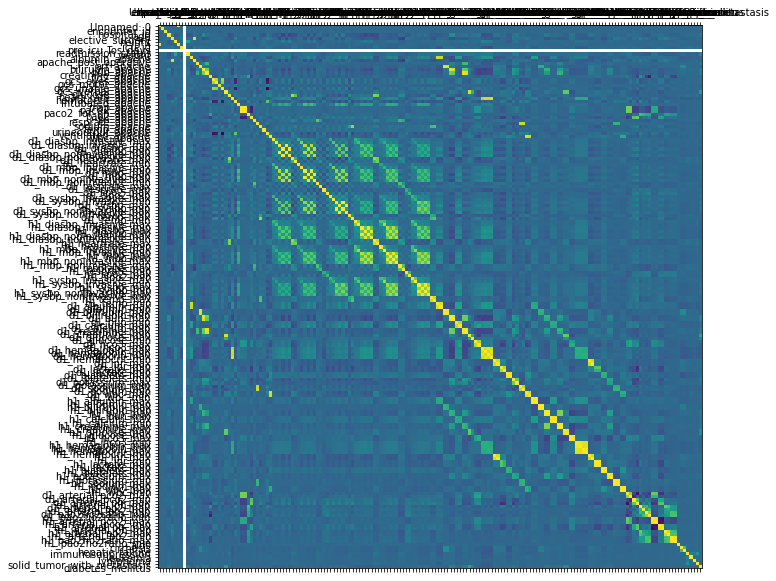

In [ ]:
# Criando o gráfico
plot_corr(df)

In [ ]:
# Visualizando a correlação em tabela
# Coeficiente de correlação
# +1 = forte correlação positiva
# 0 = não há correlação
# -1 = forte correlação negativa
df.corr()

,Unnamed: 0,encounter_id,hospital_id,age,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
Unnamed: 0,1.000000,-0.001862,-0.000194,-0.036989,-0.016849,0.008752,0.989875,-0.009097,NaN,0.000512,0.037177,-0.016019,-0.005982,0.010229,-0.010851,-0.004267,0.005350,0.014109,-0.000821,0.006288,0.008151,0.011157,0.017095,0.005721,-0.008316,-0.015341,0.003408,0.003408,0.009365,-0.012629,-0.017161,-0.034974,0.009793,0.059647,0.016015,0.016364,0.020322,0.020599,-0.004876,-0.017948,...,0.014053,0.021121,0.013857,0.019662,-0.012358,-0.017710,-0.007616,-0.007922,-0.003629,-0.004713,-0.005887,-0.000838,-0.017923,-0.014014,-0.001221,-0.002439,0.006954,0.018657,-0.020686,-0.010917,-0.019363,-0.005113,0.003778,0.003980,-0.000592,0.005574,-0.012394,-0.004630,-0.014682,0.006060,0.009058,0.013517,0.006372,-0.005301,0.000224,-0.019898,0.003937,-0.000596,-0.005415,-0.019601
encounter_id,-0.001862,1.000000,-0.001463,-0.001350,0.001618,0.001382,-0.001498,-0.001066,NaN,0.004378,0.001727,0.000235,-0.000847,-0.003587,0.000150,0.000152,0.000030,0.001553,0.003610,-0.003379,0.003620,0.000697,-0.003651,0.000948,-0.001683,-0.000002,0.006315,0.006315,-0.001894,-0.003029,-0.000320,-0.001337,-0.001851,0.004028,0.000895,0.002308,-0.000360,0.000341,-0.000159,0.002171,...,0.000699,0.001020,0.001139,0.001522,-0.005424,-0.003330,0.000638,0.000555,0.004814,0.004941,0.000326,-0.000101,-0.000022,0.000396,0.002898,0.002960,0.000565,0.002995,0.000573,0.000317,-0.003095,-0.003216,-0.000278,-0.001614,-0.000497,0.000096,-0.002290,-0.003041,0.002941,0.002757,-0.000209,-0.000571,0.002830,0.000727,-0.002442,-0.000217,-0.001831,0.002531,0.006676,-0.002007
hospital_id,-0.000194,-0.001463,1.000000,-0.019370,0.028321,0.022478,0.005414,-0.005174,NaN,0.015070,-0.004370,0.026420,0.001426,0.003382,-0.009668,0.000022,-0.010980,-0.007801,-0.013965,-0.031415,-0.012029,-0.003000,-0.001374,0.005315,0.009567,-0.005402,-0.014591,-0.014591,-0.011795,0.010542,-0.040556,0.022478,-0.019097,-0.019606,0.027235,-0.000756,-0.002778,0.018832,-0.028136,0.038957,...,0.005951,0.004597,0.009288,0.007396,-0.002976,-0.006038,-0.004312,-0.003578,-0.005178,-0.005411,-0.007091,-0.011836,0.020816,0.018597,-0.000283,-0.001116,-0.005381,-0.019858,0.024181,0.003110,-0.000387,-0.014958,0.015692,-0.005939,-0.011411,-0.012550,0.006529,0.006067,-0.008914,-0.014185,0.004047,0.000085,0.000956,0.002127,0.003403,-0.003745,0.002609,0.001734,-0.009420,0.001937
age,-0.036989,-0.001350,-0.019370,1.000000,0.057334,-0.109525,-0.035133,0.048539,NaN,-0.121448,-0.071230,0.050510,0.001281,-0.030558,0.206572,0.052231,0.012611,0.029565,0.026983,-0.002472,-0.009407,0.008900,-0.147377,-0.100118,0.004669,-0.019687,0.014634,0.014634,-0.014104,0.020129,0.031877,0.027835,-0.074786,-0.130302,0.032511,-0.010836,-0.086239,-0.116837,-0.056273,-0.209225,...,-0.056590,-0.056885,-0.047095,-

In [ ]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes_mellitus'] == True])
num_false = len(df.loc[df['diabetes_mellitus'] == False])
print("Número de casos verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false))*100))
print("Número de casos falsos: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false))*100))

Número de casos verdadeiros: 28151 (21.63%)
Número de casos falsos: 102006 (78.37%)


# **Spliting**

70% para dados de treino e 30% para dados de teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['hospital_id', 'age', 'pre_icu_los_days', 'weight', 'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'glucose_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'cirrhosis', 'hepatic_failure', 'leukemia']

In [ ]:
# Variável a ser prevista
atrib_prev = ['diabetes_mellitus']

In [ ]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [ ]:
X

array([[1.18000000e+02, 6.80000000e+01, 5.41666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.10000000e+01, 7.70000000e+01, 9.27777778e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.18000000e+02, 2.50000000e+01, 6.94444000e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.00000000e+00, 7.30000000e+01, 1.43055556e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.70000000e+02, 8.10000000e+01, 1.88194444e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.00000000e+00, 3.50000000e+01, 7.50000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
Y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
# Definindo a taxa de split
split_test_size = 0.30

In [ ]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index))*100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index))*100))

70.00% nos dados de treino
30.00% nos dados de teste


In [ ]:
X_treino

array([[1.95000000e+02, 6.10000000e+01, 1.29861111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.32000000e+02, 2.00000000e+01, 4.23611110e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.70000000e+02, 6.19951026e+01, 4.79166667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.30000000e+01, 8.70000000e+01, 2.91666670e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16000000e+02, 6.30000000e+01, 1.84027778e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.75000000e+02, 6.70000000e+01, 6.88194444e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# **Verificando o Split**

In [ ]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes_mellitus'] == 1]), (len(df.loc[df['diabetes_mellitus'] == 1])/len(df.index)* 100)))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes_mellitus'] == 0]), (len(df.loc[df['diabetes_mellitus'] == 0])/len(df.index)* 100)))

Original True : 28151 (21.63%)
Original False : 102006 (78.37%)


In [ ]:
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]),
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino)*100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]),
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino)*100)))

Training True : 19677 (21.60%)
Training False : 71432 (78.40%)


In [ ]:
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]),
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste)*100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]),
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste)*100)))

Test True : 8474 (21.70%)
Test False : 30574 (78.30%)


# **Valores Missing Ocultos**

In [ ]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [ ]:
df.head(5)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.7328,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.900000,2.300000,113,502.01,0,0,0.400000,31.00000,2.510000,0.595735,3.0,6.0,0.0,4.0,168.000000,118.0,27.400000,0,40.0,42.161246,42.161246,132.061737,7.352154,36.0,...,11.204166,11.088205,33.73183,33.349796,1.577788,1.463473,3.028198,2.976982,193.943057,193.123506,4.188984,4.147028,138.167205,137.879814,13.387873,13.336485,45.341451,38.535587,7.387687,7.322903,165.003814,102.957476,287.600071,224.005403,44.552966,43.341081,7.337283,7.327771,163.035835,145.949537,247.525419,239.617358,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.4219,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.200000,2.886149,108,203.01,0,0,1.201222,9.00000,0.560000,1.000000,1.0,3.0,0.0,1.0,145.000000,120.0,36.900000,0,46.0,37.000000,37.000000,51.000000,7.450000,33.0,...,11.300000,11.300000,36.90000,36.900000,1.300000,1.300000,3.500000,3.500000,557.000000,557.000000,4.200000,4.200000,145.000000,145.000000,12.700000,12.700000,37.000000,37.000000,7.450000,7.450000,51.000000,51.000000,54.800000,51.000000,37.000000,37.000000,7.450000,7.450000,51.000000,51.000000,51.000000,51.000000,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.9527,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.300000,2.886149,122,703.03,0,0,1.201222,25.71807,1.481629,0.595735,3.0,6.0,0.0,5.0,160.141416,102.0,32.975817,0,68.0,42.161246,42.161246,132.061737,7.352154,37.0,...,11.204166,11.088205,33.73183,33.349796,1.577788,1.463473,3.028198,2.976982,193.943057,193.123506,4.188984,4.147028,138.167205,137.879814,13.387873,13.336485,45.341451,38.535587,7.387687,7.322903,165.003814,102.957476,287.600071,224.005403,44.552966,43.341081,7.337283,7.327771,163.035835,145.949537,247.525419,239.617358,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.6355,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.700000,2.886149,203,1206.03,1,0,1.201222,25.71807,1.481629,0.600000,4.0,6.0,0.0,5.0,185.000000,114.0,25.900000,1,60.0,30.000000,30.000000,142.000000,7.390000,4.0,...,11.600000,11.600000,34.00000,34.000000,1.600000,1.100000,3.028198,2.976982,43.000000,43.000000,4.188984,4.147028,138.167205,137.879814,8.800000,8.800000,37.000000,27.000000,7.440000,7.340000,337.000000,102.000000,342.500000,236.666667,36.000000,33.000000,7.370000,7.340000,337.000000,265.000000,337.000000,337.000000,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,None,0,Caucasian,M,188.0,None,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,83.791104,2.886149,119,601.01,0,0,1.201222,25.71807,1.481629,0.595735,4.0,6.0,0.0,5.0,160.141416,60.0,32.975817,0,103.0,42.161246,42.161246,132.061737,7.352154,16.0,...,11.204166,11.088205,33.73183,33.349796,1.577788,1.463473,

In [ ]:
# Verificando as variáveis que não são binárias (float ou integer) se possuem valor 0
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing encounter_id: {0}".format(len(df.loc[df['encounter_id'] == 0])))
print("# Linhas missing hospital_id: {0}".format(len(df.loc[df['hospital_id'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing ethnicity: {0}".format(len(df.loc[df['ethnicity'] == 0])))
print("# Linhas missing gender: {0}".format(len(df.loc[df['gender'] == 0])))
print("# Linhas missing height: {0}".format(len(df.loc[df['height'] == 0])))
print("# Linhas missing icu_id: {0}".format(len(df.loc[df['icu_id'] == 0])))
print("# Linhas missing pre_icu_los_days: {0}".format(len(df.loc[df['pre_icu_los_days'] == 0])))
print("# Linhas missing weight: {0}".format(len(df.loc[df['weight'] == 0])))
print("# Linhas missing albumin_apache: {0}".format(len(df.loc[df['albumin_apache'] == 0])))
print("# Linhas missing bilirubin_apache: {0}".format(len(df.loc[df['bilirubin_apache'] == 0])))
print("# Linhas missing bun_apache: {0}".format(len(df.loc[df['bun_apache'] == 0])))
print("# Linhas missing creatinine_apache: {0}".format(len(df.loc[df['creatinine_apache'] == 0])))
print("# Linhas missing fio2_apache: {0}".format(len(df.loc[df['fio2_apache'] == 0])))
print("# Linhas missing gcs_eyes_apache: {0}".format(len(df.loc[df['gcs_eyes_apache'] == 0])))
print("# Linhas missing gcs_motor_apache: {0}".format(len(df.loc[df['gcs_motor_apache'] == 0])))
print("# Linhas missing gcs_verbal_apache: {0}".format(len(df.loc[df['gcs_verbal_apache'] == 0])))
print("# Linhas missing glucose_apache: {0}".format(len(df.loc[df['glucose_apache'] == 0])))
print("# Linhas missing map_apache: {0}".format(len(df.loc[df['map_apache'] == 0])))
print("# Linhas missing paco2_apache: {0}".format(len(df.loc[df['paco2_apache'] == 0])))
print("# Linhas missing paco2_for_ph_apache: {0}".format(len(df.loc[df['paco2_for_ph_apache'] == 0])))
print("# Linhas missing urineoutput_apache: {0}".format(len(df.loc[df['urineoutput_apache'] == 0])))
print("# Linhas missing ventilated_apache: {0}".format(len(df.loc[df['ventilated_apache'] == 0])))
print("# Linhas missing wbc_apache: {0}".format(len(df.loc[df['wbc_apache'] == 0])))
print("# Linhas missing h1_inr_max: {0}".format(len(df.loc[df['h1_inr_max'] == 0])))
print("# Linhas missing h1_inr_min: {0}".format(len(df.loc[df['h1_inr_min'] == 0])))
print("# Linhas missing h1_lactate_max: {0}".format(len(df.loc[df['h1_lactate_max'] == 0])))
print("# Linhas missing h1_lactate_min: {0}".format(len(df.loc[df['h1_lactate_min'] == 0])))
print("# Linhas missing h1_platelets_max: {0}".format(len(df.loc[df['h1_platelets_max'] == 0])))
print("# Linhas missing h1_platelets_min: {0}".format(len(df.loc[df['h1_platelets_min'] == 0])))
print("# Linhas missing h1_potassium_max: {0}".format(len(df.loc[df['h1_potassium_max'] == 0])))
print("# Linhas missing h1_potassium_min: {0}".format(len(df.loc[df['h1_potassium_min'] == 0])))
print("# Linhas missing h1_wbc_max: {0}".format(len(df.loc[df['h1_wbc_max'] == 0])))
print("# Linhas missing h1_wbc_min: {0}".format(len(df.loc[df['h1_wbc_min'] == 0])))
print("# Linhas missing d1_arterial_pco2_max: {0}".format(len(df.loc[df['d1_arterial_pco2_max'] == 0])))
print("# Linhas missing d1_arterial_pco2_min: {0}".format(len(df.loc[df['d1_arterial_pco2_min'] == 0])))
print("# Linhas missing cirrhosis: {0}".format(len(df.loc[df['cirrhosis'] == 0])))
print("# Linhas missing hepatic_failure: {0}".format(len(df.loc[df['hepatic_failure'] == 0])))
print("# Linhas missing leukemia: {0}".format(len(df.loc[df['leukemia'] == 0])))


# Linhas no dataframe 130157
# Linhas missing encounter_id: 0
# Linhas missing hospital_id: 0
# Linhas missing age: 30
# Linhas missing bmi: 0
# Linhas missing ethnicity: 0
# Linhas missing gender: 0
# Linhas missing height: 0
# Linhas missing icu_id: 0
# Linhas missing pre_icu_los_days: 5364
# Linhas missing weight: 0
# Linhas missing albumin_apache: 0
# Linhas missing bilirubin_apache: 0
# Linhas missing bun_apache: 0
# Linhas missing creatinine_apache: 0
# Linhas missing fio2_apache: 0
# Linhas missing gcs_eyes_apache: 0
# Linhas missing gcs_motor_apache: 0
# Linhas missing gcs_verbal_apache: 0
# Linhas missing glucose_apache: 0
# Linhas missing map_apache: 0
# Linhas missing paco2_apache: 0
# Linhas missing paco2_for_ph_apache: 0
# Linhas missing urineoutput_apache: 1279
# Linhas missing ventilated_apache: 87149
# Linhas missing wbc_apache: 0
# Linhas missing h1_inr_max: 0
# Linhas missing h1_inr_min: 0
# Linhas missing h1_lactate_max: 0
# Linhas missing h1_lactate_min: 0
# Linhas 

# **Tratando Dados Missing - Imput**

Substituindo os valores iguais a zero, pela média dos dados

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = 'mean', fill_value=None, verbose=0, copy=True)

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

# **Construindo e treinando o modelo**

In [ ]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Criando o modelo preditivo
modelo_vl = GaussianNB()

In [ ]:
# Treinando o modelo
modelo_vl.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

# **Verificando a exatidão no modelo nos dados de treino**

In [ ]:
from sklearn import metrics

In [ ]:
nb_predict_train = modelo_vl.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.7542



# **Verificando a Exatidão do Modelo nos Dados de Teste**

In [ ]:
nb_predict_test = modelo_vl.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.7500



# **Métricas**

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels=[1,0]))

Confusion Matrix
[[ 2558  5916]
 [ 3845 26729]]

Classification Report
              precision    recall  f1-score   support

           1       0.40      0.30      0.34      8474
           0       0.82      0.87      0.85     30574

    accuracy                           0.75     39048
   macro avg       0.61      0.59      0.59     39048
weighted avg       0.73      0.75      0.74     39048



# **Otimizando o Modelo com Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [ ]:
# Verificando os dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.8139



In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels=[1,0]))

Confusion Matrix
[[ 2705  5769]
 [ 1497 29077]]

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.32      0.43      8474
           0       0.83      0.95      0.89     30574

    accuracy                           0.81     39048
   macro avg       0.74      0.64      0.66     39048
weighted avg       0.79      0.81      0.79     39048



# **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels=[1,0]))

Exatidão (Accuracy): 0.7950

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.18      0.28      8474
           0       0.81      0.96      0.88     30574

    accuracy                           0.80     39048
   macro avg       0.70      0.57      0.58     39048
weighted avg       0.76      0.80      0.75     39048



# **Exportando Previsões com o Modelo Treinado**

In [ ]:
# Ajustando o Transformer API
scaler = preprocessing.StandardScaler().fit(X_treino)

In [ ]:
X_treino_scaled = scaler.transform(X_treino)

In [ ]:
#n_estimators=100 (número de nós) , n_jobs=-1 ( todo o processamento possível) , warm_start=True (mantém o aprendizado e reprocessa o modelo, melhorando-o)
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=200, n_jobs=-1, warm_start=True))

In [ ]:
# max_features : O número de features a considerar quando pesquisar pela melhor separação (testará as 3 opções e identificará a melhor para o modelo)
# max_depth :  Profundidade máxima da árvore de decisão. Se None (nenhuma), os nós serão expandidos até acabar as folhas ou até que elas contenham o mínimo valor de amostras possível.
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [ ]:
pred_diabetes = modelo_v2.predict(X_teste)

In [ ]:
df_resposta = pd.DataFrame()

In [ ]:
df_resposta['diabetes_mellitus'] = np.around(rf_predict_test,2)

In [ ]:
df_resposta.shape

(39048, 1)

In [ ]:
df_resposta['diabetes_mellitus'].unique()

array([0, 1])

In [ ]:
df_resposta.to_csv('submit.csv', index=False, header=True)